## KNN Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [2]:
# Load the data

from sklearn.datasets import make_regression # Generate regression data
X, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)

In [3]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
# Create the model

regressor = KNeighborsRegressor(n_neighbors=5,algorithm= 'auto')
regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [5]:
# Make predictions

y_pred = regressor.predict(X_test)


In [6]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [7]:
# Print the metrics

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')

Mean Squared Error: 132.70133826064995
Mean Absolute Error: 9.269174435861805
R^2: 0.9155927746462499


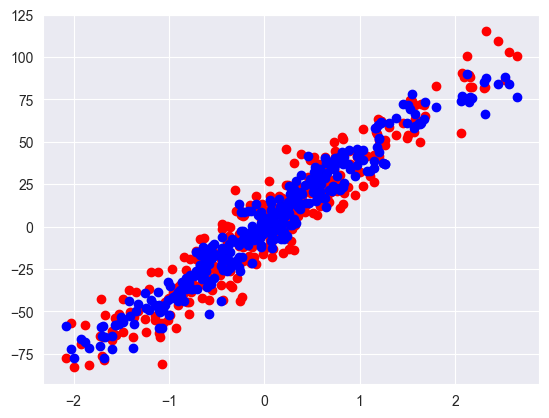

In [8]:
# Plot the data

plt.scatter(X_test[:,0], y_test, color='red')
plt.scatter(X_test[:,0], y_pred, color='blue')
plt.show()


In [10]:
#find the best value for n_neighbors, we can use GridSearchCV to do an exhaustive search over specified parameter values for an estimator.

from sklearn.model_selection import GridSearchCV

# Create a dictionary with the hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}



In [11]:
print(param_grid)

{'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


In [12]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)


In [13]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [14]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


In [15]:
# Create the model with the best hyperparameters
best_regressor = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'],weights=best_params['weights'],algorithm=best_params['algorithm'])

In [17]:
# Fit the model

best_regressor.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=7, weights='distance')